In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub

# Download Education & Career Success Dataset
edu_career_path = kagglehub.dataset_download("adilshamim8/education-and-career-success")
print("Path to Education & Career Success Dataset:", edu_career_path)

# Download Graduate Admissions Dataset
grad_admissions_path = kagglehub.dataset_download("mohansacharya/graduate-admissions")
print("Path to Graduate Admissions Dataset:", grad_admissions_path)

# Download World University Rankings Dataset
world_rankings_path = kagglehub.dataset_download("mylesoneill/world-university-rankings")
print("Path to World University Rankings Dataset:", world_rankings_path)

# Download Job Placement Dataset
job_placement_path = kagglehub.dataset_download("ahsan81/job-placement-dataset")
print("Path to Job Placement Dataset:", job_placement_path)

100%|██████████| 118k/118k [00:00<00:00, 33.5MB/s]

Extracting files...
Path to Education & Career Success Dataset: /root/.cache/kagglehub/datasets/adilshamim8/education-and-career-success/versions/1


100%|██████████| 9.64k/9.64k [00:00<00:00, 11.7MB/s]

Extracting files...
Path to Graduate Admissions Dataset: /root/.cache/kagglehub/datasets/mohansacharya/graduate-admissions/versions/2


100%|██████████| 1.41M/1.41M [00:00<00:00, 59.1MB/s]

Extracting files...
Path to World University Rankings Dataset: /root/.cache/kagglehub/datasets/mylesoneill/world-university-rankings/versions/2


100%|██████████| 3.58k/3.58k [00:00<00:00, 5.88MB/s]

Extracting files...
Path to Job Placement Dataset: /root/.cache/kagglehub/datasets/ahsan81/job-placement-dataset/versions/1


In [ ]:
import pandas as pd

# Load Education & Career Success Dataset
edu_career_df = pd.read_csv(f"{edu_career_path}/education_career_success.csv")  # Replace with the actual file name
print("Education & Career Success Dataset:")
print(edu_career_df.head())

# Load Graduate Admissions Dataset
grad_admissions_df = pd.read_csv(f"{grad_admissions_path}/Admission_Predict.csv")  # Replace with the actual file name
print("\nGraduate Admissions Dataset:")
print(grad_admissions_df.head())

# Load World University Rankings Dataset
world_rankings_df = pd.read_csv(f"{world_rankings_path}/cwurData.csv")  # Replace with the actual file name
print("\nWorld University Rankings Dataset:")
print(world_rankings_df.head())

# Load Job Placement Dataset
job_placement_df = pd.read_csv(f"{job_placement_path}/Job_Placement_Data.csv")  # Replace with the actual file name
print("\nJob Placement Dataset:")
print(job_placement_df.head())

Education & Career Success Dataset:
  Student_ID  Age  Gender  High_School_GPA  SAT_Score  University_Ranking  \
0     S00001   24    Male             3.58       1052                 291   
1     S00002   21   Other             2.52       1211                 112   
2     S00003   28  Female             3.42       1193                 715   
3     S00004   25    Male             2.43       1497                 170   
4     S00005   22    Male             2.08       1012                 599   

   University_GPA    Field_of_Study  Internships_Completed  \
0            3.96              Arts                      3   
1            3.63               Law                      4   
2            2.63          Medicine                      4   
3            2.81  Computer Science                      3   
4            2.48       Engineering                      4   

   Projects_Completed  Certifications  Soft_Skills_Score  Networking_Score  \
0                   7               2             

In [ ]:
# Check the shape of each dataset
print("Education & Career Success Dataset Shape:", edu_career_df.shape)
print("Graduate Admissions Dataset Shape:", grad_admissions_df.shape)
print("World University Rankings Dataset Shape:", world_rankings_df.shape)
print("Job Placement Dataset Shape:", job_placement_df.shape)

# Check for missing values
print("\nMissing Values in Education & Career Success Dataset:")
print(edu_career_df.isnull().sum())

print("\nMissing Values in Graduate Admissions Dataset:")
print(grad_admissions_df.isnull().sum())

print("\nMissing Values in World University Rankings Dataset:")
print(world_rankings_df.isnull().sum())

print("\nMissing Values in Job Placement Dataset:")
print(job_placement_df.isnull().sum())

Education & Career Success Dataset Shape: (5000, 20)
Graduate Admissions Dataset Shape: (400, 9)
World University Rankings Dataset Shape: (2200, 14)
Job Placement Dataset Shape: (215, 13)

Missing Values in Education & Career Success Dataset:
Student_ID               0
Age                      0
Gender                   0
High_School_GPA          0
SAT_Score                0
University_Ranking       0
University_GPA           0
Field_of_Study           0
Internships_Completed    0
Projects_Completed       0
Certifications           0
Soft_Skills_Score        0
Networking_Score         0
Job_Offers               0
Starting_Salary          0
Career_Satisfaction      0
Years_to_Promotion       0
Current_Job_Level        0
Work_Life_Balance        0
Entrepreneurship         0
dtype: int64

Missing Values in Graduate Admissions Dataset:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA              

In [ ]:
# Check column names in Education & Career Success Dataset
print("Education & Career Success Dataset Columns:")
print(edu_career_df.columns)

# Check column names in World University Rankings Dataset
print("\nWorld University Rankings Dataset Columns:")
print(world_rankings_df.columns)


Education & Career Success Dataset Columns:
Index(['Student_ID', 'Age', 'Gender', 'High_School_GPA', 'SAT_Score',
       'University_Ranking', 'University_GPA', 'Field_of_Study',
       'Internships_Completed', 'Projects_Completed', 'Certifications',
       'Soft_Skills_Score', 'Networking_Score', 'Job_Offers',
       'Starting_Salary', 'Career_Satisfaction', 'Years_to_Promotion',
       'Current_Job_Level', 'Work_Life_Balance', 'Entrepreneurship'],
      dtype='object')

World University Rankings Dataset Columns:
Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')


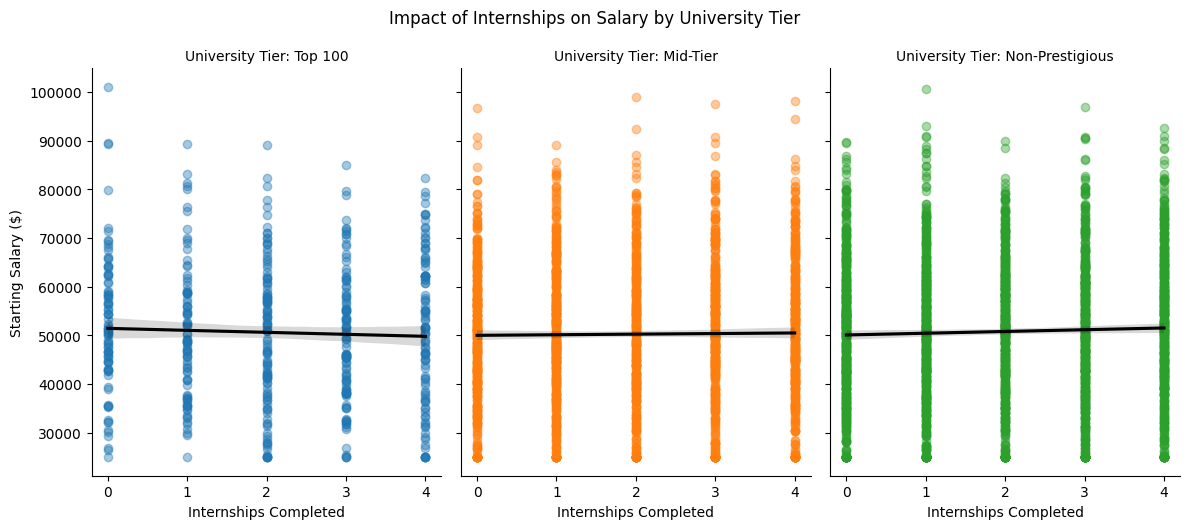

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bin university rankings into tiers (e.g., Top 100, Mid-Tier, Non-Prestigious)
edu_career_df["University_Tier"] = pd.cut(
    edu_career_df["University_Ranking"],
    bins=[0, 100, 500, 1000],
    labels=["Top 100", "Mid-Tier", "Non-Prestigious"]
)

# Create a faceted scatterplot with regression lines
g = sns.lmplot(
    data=edu_career_df,
    x="Internships_Completed",
    y="Starting_Salary",
    hue="University_Tier",
    col="University_Tier",
    height=5,
    aspect=0.8,
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "black"}
)
g.set_axis_labels("Internships Completed", "Starting Salary ($)")
g.set_titles("University Tier: {col_name}")
plt.suptitle("Impact of Internships on Salary by University Tier", y=1.05)
plt.show()

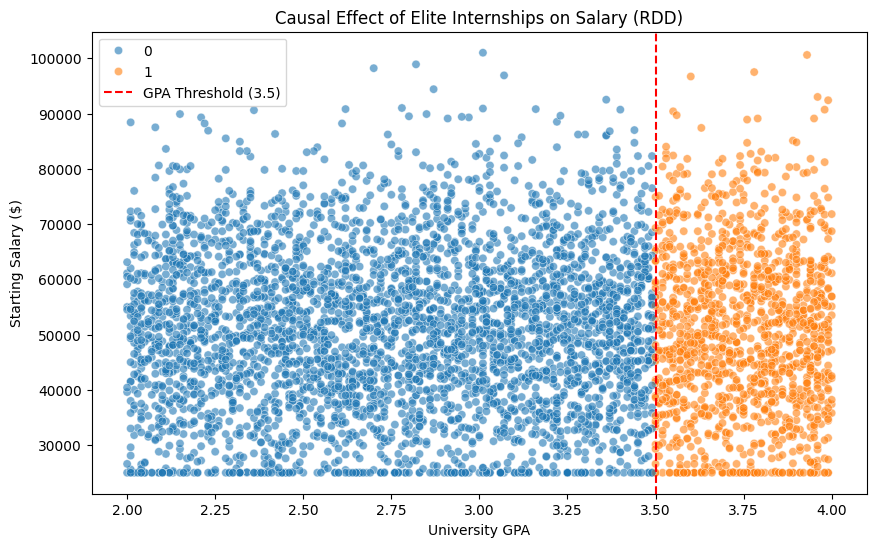

In [15]:
import statsmodels.api as sm

# Simulate GPA and internship data (modify as needed)
# Assume internships requiring GPA ≥ 3.5 are "elite"
edu_career_df["Elite_Internship"] = (edu_career_df["University_GPA"] >= 3.5).astype(int)

# RDD Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="University_GPA",
    y="Starting_Salary",
    hue="Elite_Internship",
    data=edu_career_df,
    alpha=0.6
)
plt.axvline(x=3.5, color="red", linestyle="--", label="GPA Threshold (3.5)")
plt.title("Causal Effect of Elite Internships on Salary (RDD)")
plt.xlabel("University GPA")
plt.ylabel("Starting Salary ($)")
plt.legend()
plt.show()

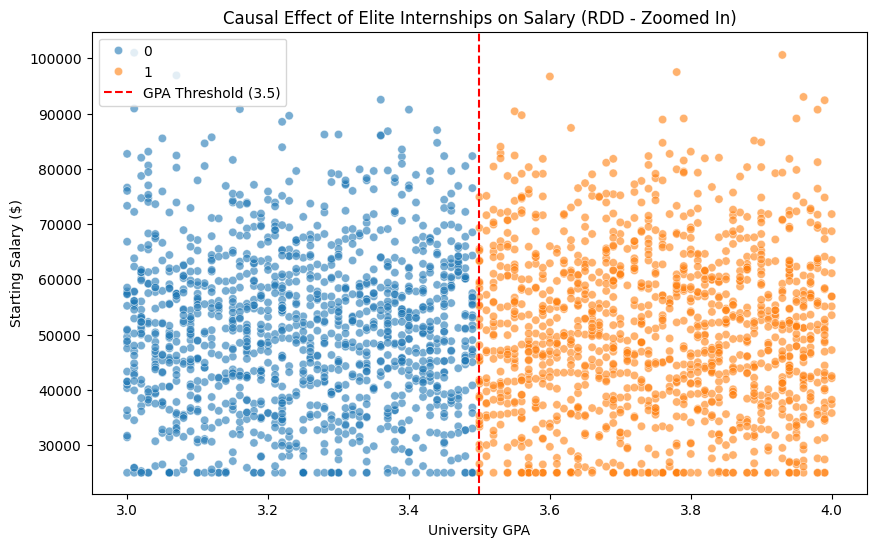

In [18]:
# Filter data near the threshold
threshold_data = edu_career_df[(edu_career_df["University_GPA"] >= 3.0) & (edu_career_df["University_GPA"] <= 4.0)]

# RDD Plot (zoomed in)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="University_GPA",
    y="Starting_Salary",
    hue="Elite_Internship",
    data=threshold_data,
    alpha=0.6
)
plt.axvline(x=3.5, color="red", linestyle="--", label="GPA Threshold (3.5)")
plt.title("Causal Effect of Elite Internships on Salary (RDD - Zoomed In)")
plt.xlabel("University GPA")
plt.ylabel("Starting Salary ($)")
plt.legend()
plt.show()

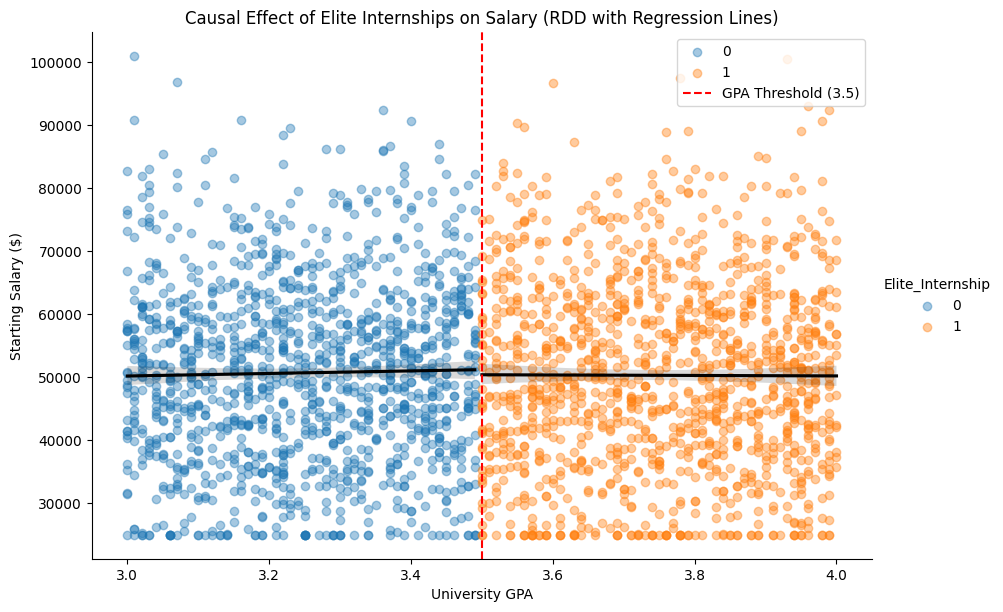

In [19]:
# Add regression lines
sns.lmplot(
    x="University_GPA",
    y="Starting_Salary",
    hue="Elite_Internship",
    data=threshold_data,
    height=6,
    aspect=1.5,
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "black"}
)
plt.axvline(x=3.5, color="red", linestyle="--", label="GPA Threshold (3.5)")
plt.title("Causal Effect of Elite Internships on Salary (RDD with Regression Lines)")
plt.xlabel("University GPA")
plt.ylabel("Starting Salary ($)")
plt.legend()
plt.show()

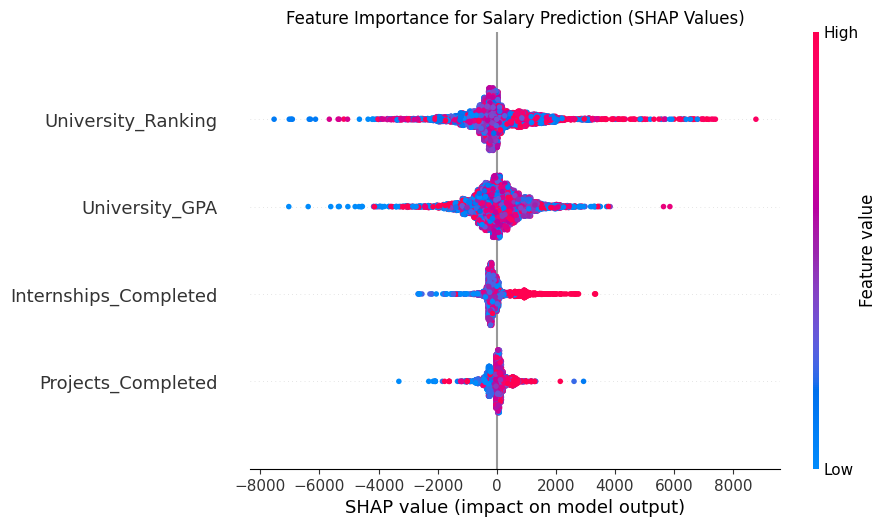

In [16]:
import shap
from sklearn.ensemble import GradientBoostingRegressor

# Train a model
X = edu_career_df[["Internships_Completed", "University_Ranking", "University_GPA", "Projects_Completed"]]
y = edu_career_df["Starting_Salary"]
model = GradientBoostingRegressor().fit(X, y)

# SHAP analysis
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Plot
shap.summary_plot(shap_values, X, plot_type="dot", show=False)
plt.title("Feature Importance for Salary Prediction (SHAP Values)")
plt.gcf().set_size_inches(10, 6)
plt.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

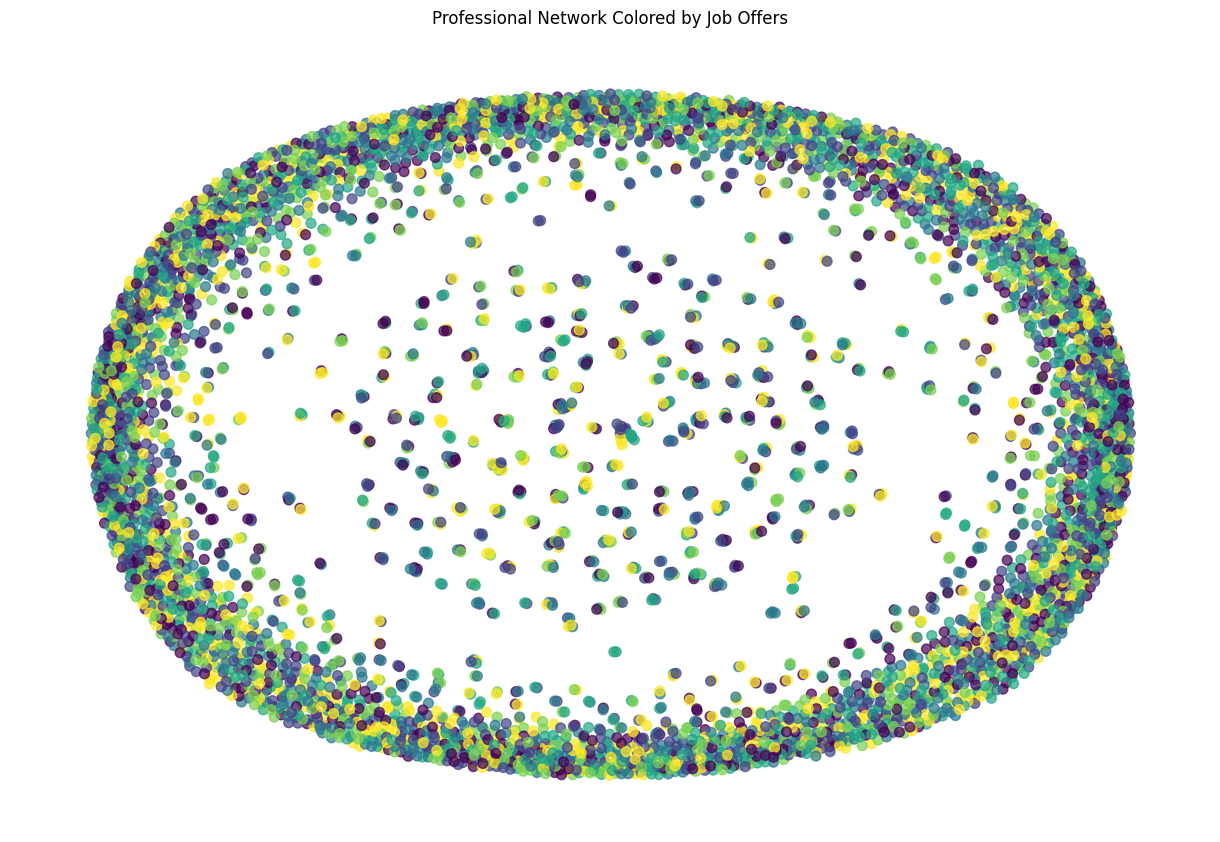

In [17]:
import networkx as nx

# Simulate a professional network (modify with your networking data)
# Example: Nodes = students, Edges = professional connections
G = nx.Graph()
G.add_nodes_from(edu_career_df["Student_ID"])
# Add edges (example: random connections for demonstration)
import random
for _ in range(1000):
    G.add_edge(random.choice(edu_career_df["Student_ID"]), random.choice(edu_career_df["Student_ID"]))

# Color nodes by job offers
node_colors = edu_career_df.set_index("Student_ID")["Job_Offers"].to_dict()
node_colors = [node_colors[node] for node in G.nodes()]

# Plot
plt.figure(figsize=(12, 8))
nx.draw_spring(
    G,
    node_color=node_colors,
    cmap="viridis",
    with_labels=False,
    node_size=50,
    alpha=0.7
)
plt.title("Professional Network Colored by Job Offers")
plt.colorbar(plt.cm.ScalarMappable(cmap="viridis"), label="Job Offers")
plt.show()

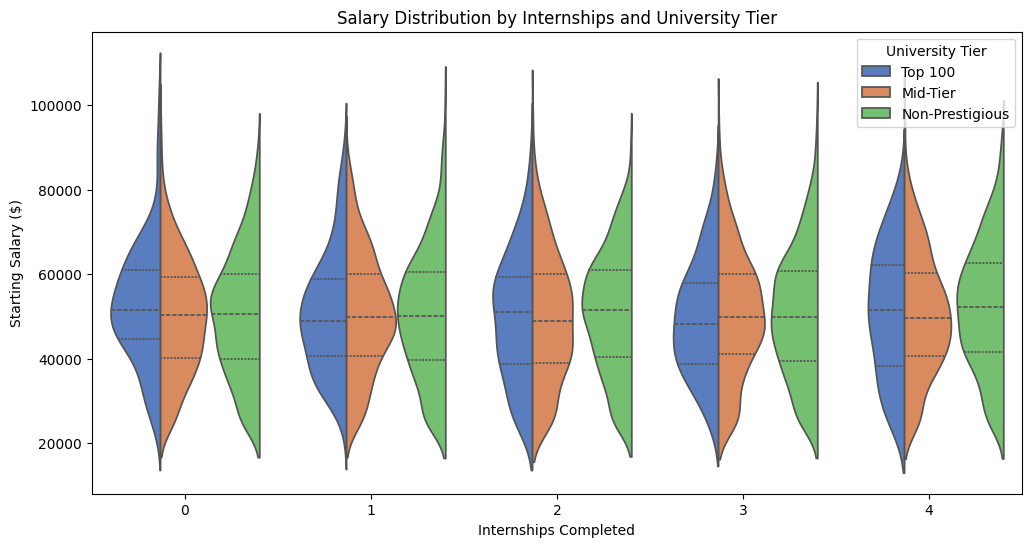

In [20]:
plt.figure(figsize=(12, 6))
sns.violinplot(
    x="Internships_Completed",
    y="Starting_Salary",
    hue="University_Tier",
    data=edu_career_df,
    split=True,
    inner="quartile",
    palette="muted"
)
plt.title("Salary Distribution by Internships and University Tier")
plt.xlabel("Internships Completed")
plt.ylabel("Starting Salary ($)")
plt.legend(title="University Tier")
plt.show()